In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions, plot_history

In [2]:
'''Train a Bidirectional LSTM on the IMDB sentiment classification task.
'''

np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from keras.layers.core import Flatten
from keras.datasets import imdb
from keras_tqdm import TQDMNotebookCallback

max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('X_train shape(before pad_sequences): ', X_train.shape)
print('X_test shape(before pad_sequences): ', X_train.shape)

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
X_train shape(before pad_sequences):  (25000,)
X_test shape(before pad_sequences):  (25000,)
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


In [3]:
layers = 128
dropout = 0.2
epochs = 3
batch_size = 128

# LSTM

In [4]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(layers))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 37s 2ms/step - loss: 0.4648 - acc: 0.7741 - val_loss: 0.3481 - val_acc: 0.8464
Epoch 2/3
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2374 - acc: 0.9070 - val_loss: 0.3545 - val_acc: 0.8448
Epoch 3/3
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1490 - acc: 0.9482 - val_loss: 0.5071 - val_acc: 0.8330


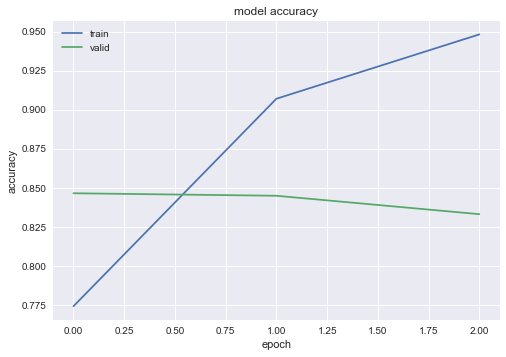

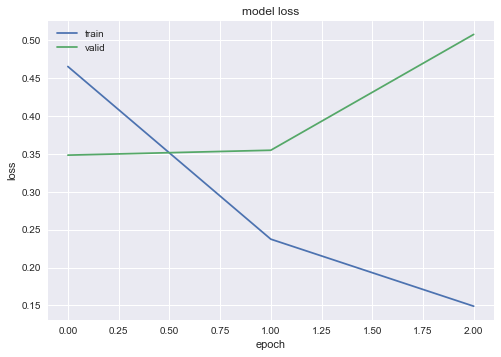

In [6]:
plot_history(history)

In [7]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 16s 655us/step


0.8264

# BLSTM

In [8]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(layers)))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 60s 3ms/step - loss: 0.4614 - acc: 0.7738 - val_loss: 0.3494 - val_acc: 0.8456
Epoch 2/3
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2302 - acc: 0.9136 - val_loss: 0.3497 - val_acc: 0.8526
Epoch 3/3
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1484 - acc: 0.9490 - val_loss: 0.5423 - val_acc: 0.8298


In [10]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 22s 886us/step


0.81904

# SimpleRNN

In [11]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 19s 927us/step - loss: 0.6278 - acc: 0.6275 - val_loss: 0.5543 - val_acc: 0.7054
Epoch 2/3
20000/20000 [==============================] - 17s 867us/step - loss: 0.3938 - acc: 0.8298 - val_loss: 0.4116 - val_acc: 0.8196
Epoch 3/3
20000/20000 [==============================] - 17s 861us/step - loss: 0.2647 - acc: 0.8973 - val_loss: 0.4564 - val_acc: 0.8054


In [13]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 8s 325us/step


0.80504

# GRU

In [14]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(GRU(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 33s 2ms/step - loss: 0.4960 - acc: 0.7460 - val_loss: 0.4931 - val_acc: 0.8098
Epoch 2/3
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2559 - acc: 0.8975 - val_loss: 0.4102 - val_acc: 0.8364
Epoch 3/3
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1587 - acc: 0.9434 - val_loss: 0.4368 - val_acc: 0.8366


In [16]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 15s 591us/step


0.8364

# Dense

In [17]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Dense(layers)) 
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dense_5 (Dense)              (None, 100, 128)          16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 12801     
Total params: 2,589,313
Trainable params: 2,589,313
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 11s 573us/step - loss: 0.4929 - acc: 0.7486 - val_loss: 0.3442 - val_acc: 0.8420
Epoch 2/3
20000/20000 [==============================] - 11s 558us/step - loss: 0.2173 - acc: 0.9134 - val_loss: 0.3506 - val_acc: 0.8470
Epoch 3/3
20000/20000 [==============================] - 11s 557us/step - loss: 0.0941 - acc: 0.9705 - val_loss: 0.4347 - val_acc: 0.8366


In [19]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 3s 120us/step


0.8366

# Summary

| 모델 | 레이어 | 드롭아웃 | 에폭 | 시간 | 정확도(valid) | 정확도(test) | 의견 |
|------|------|------|------|------|------|------|------|
| LSTM | 128 | 0.2 | 2 | 2:59 | 0.84 | 0.84 | |
| | 128 | 0.5 | 2 | 2:58 | 0.83 | 0.83 | |
| BLSTM | 128 | 0.2 | 2 | 3:52 | 0.84 | 0.84 | |
| | 128 | 0.5 | 2 | 3:53 | 0.83 | 0.84 | |
| SimpleRNN | 128 | 0.2 | 2 | 0:50 | 0.77 | 0.77 | |
| | 128 | 0.2 | 10 | 0:50 | 0.72 | 0.73 | epochs를 높여도 80점을 넘기지 못하며 학습을 할수록 점수가 떨어진다. |
| | 128 | 0.5 | 2 | 0:52 | 0.77 | 0.78 | |
| GRU | 128 | 0.2 | 2 | 2:32 | 0.84 | 0.84 | |
| | 128 | 0.5 | 2 | 2:28 | 0.84 | 0.84 | |
| | 128 | 0.5 | 10 | 2:23 | 0.81 | 0.80 | 학습을 할수록 점수가 떨어진다. |
|Dense|128|0.5|2|0:25|0.84|0.84||
||128|	0.2| 	2|	0:24|	0.83|	0.83|| 	
||64|	0.5| 	2|	0:25|	0.84|	0.84|| 	
||64|	0.2| 	2|	0:25|	0.84|	0.83||	
||64|	0.5| 	10|	0:25|	0.82|	0.82|	5 epochs 이후 loss가 0.01에서 더 이상 떨어지지 않는다.|
||64|	0.2| 	10|	0:24|	0.84|	0.81| 	5 epochs 이후 loss가 0.001에서 더 이상 떨어지지 않는다.|
||128|	0.2| 	10|	0:22|	0.84|	0.83| 	마찬가지로 5 epochs 이후 loss가 0.001 미만이다.|

# Predict Probability

In [20]:
X_test.shape

(25000, 100)

In [21]:
X_test[2]

array([    4,  5673,     7,    15, 18760,  9252,  3286,   325,    12,
          62,    30,   776,     8,    67,    14,    17,     6, 12214,
          44,   148,   687,     2,   203,    42,   203,    24,    28,
          69,     2,  6676,    11,   330,    54,    29,    93,     2,
          21,   845, 14148,    27,  1099,     7,   819,     4,    22,
        1407,    17,     6, 14967,   787,     7,  2460, 19569,     2,
         100,    30,     4,  3737,  3617,  3169,  2321,    42,  1898,
          11,     4,  3814,    42,   101,   704,     7,   101,   999,
          15,  1625,    94,  2926,   180,     5,     9,  9101,    34,
       15205,    45,     6,  1429,    22,    60,     6,  1220,    31,
          11,    94,  6408,    96,    21,    94,   749,     9,    57,
         975], dtype=int32)

In [22]:
word_index = imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

In [23]:
' '.join(index_word.get(w) for w in X_test[2])

"of rukh br for cupboard expressing stunts black that story at actual in can as movie is strands has though songs and action it's action his one me and grass this second no all way and not lee warhol be moves br figure of you boss movie is snatched 9 br propaganda resumed and after at of smoke splendid snow saturday it's results this of load it's think class br think cop for games make southern things to it jolly who gladys if is boyfriend you which is tony by this make residents too not make above it even background"

In [24]:
x = X_test[2].reshape(1, 100)
x.shape
# x.T
model.predict_proba(x)

array([[0.9861103]], dtype=float32)

In [25]:
model.predict(x)

array([[0.9861103]], dtype=float32)

In [26]:
x

array([[    4,  5673,     7,    15, 18760,  9252,  3286,   325,    12,
           62,    30,   776,     8,    67,    14,    17,     6, 12214,
           44,   148,   687,     2,   203,    42,   203,    24,    28,
           69,     2,  6676,    11,   330,    54,    29,    93,     2,
           21,   845, 14148,    27,  1099,     7,   819,     4,    22,
         1407,    17,     6, 14967,   787,     7,  2460, 19569,     2,
          100,    30,     4,  3737,  3617,  3169,  2321,    42,  1898,
           11,     4,  3814,    42,   101,   704,     7,   101,   999,
           15,  1625,    94,  2926,   180,     5,     9,  9101,    34,
        15205,    45,     6,  1429,    22,    60,     6,  1220,    31,
           11,    94,  6408,    96,    21,    94,   749,     9,    57,
          975]], dtype=int32)

In [27]:
y_test[2]

1

In [28]:
model.evaluate(X_test[:2], y_test[:2])

2/2 [==============================] - 0s 584us/step


[0.15424253046512604, 1.0]